# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
# Clustering
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
# Metrics
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data = pd.read_csv("bank_transactions_data_2.csv")
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
data.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000001,AC00362,NaN,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [5]:
print(data.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [6]:
print(data.duplicated().sum())

0


In [7]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

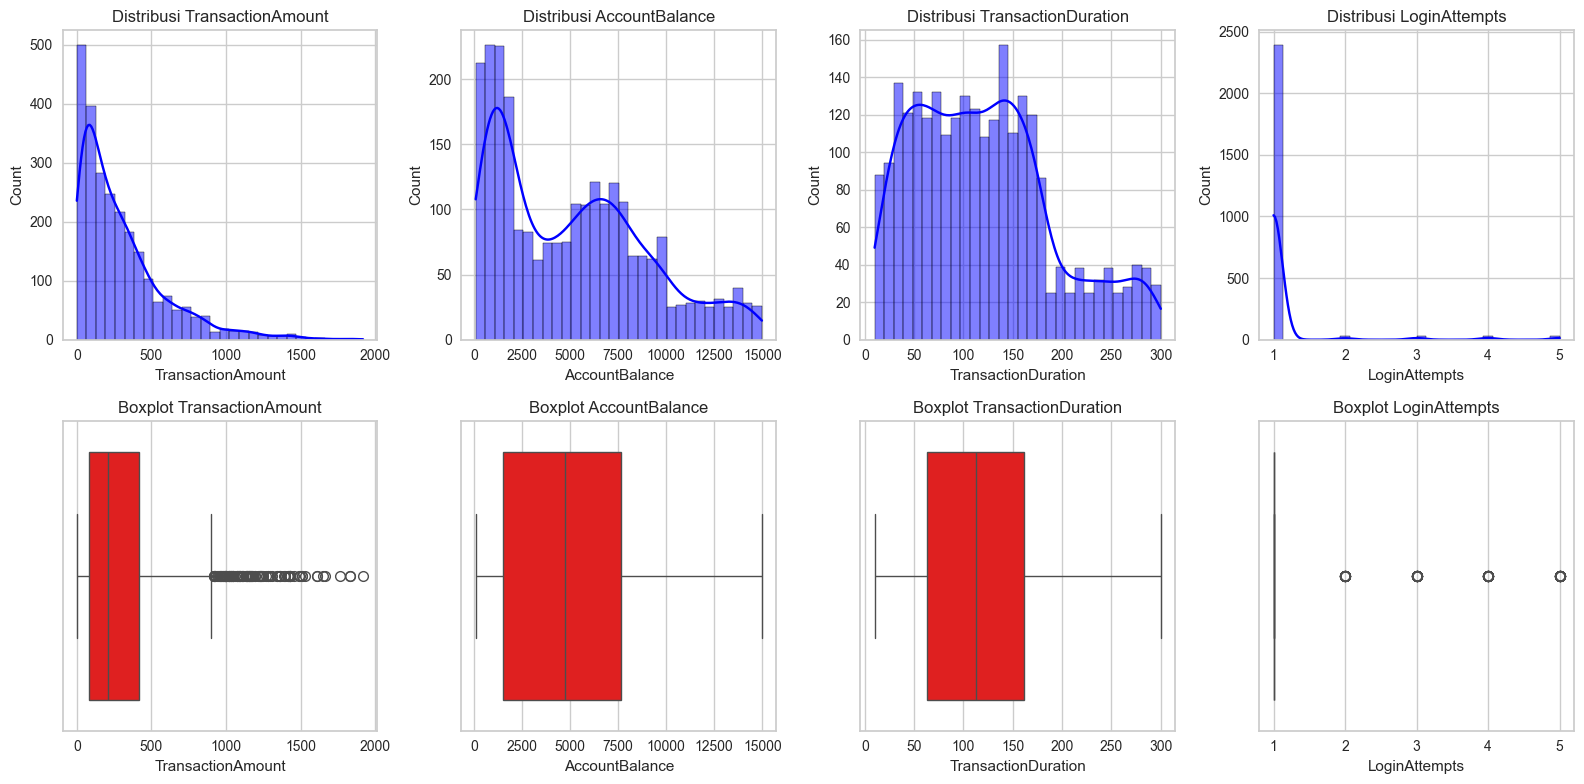

In [8]:
# Distribusi Data Numerik
numerical_cols = ["TransactionAmount", "AccountBalance", "TransactionDuration", "LoginAttempts"]
fig, axes = plt.subplots(2, len(numerical_cols), figsize=(16, 8))

for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(data[col], bins=30, kde=True, ax=axes[0, i], color="blue")
    axes[0, i].set_title(f"Distribusi {col}")
    
    # Boxplot
    sns.boxplot(x=data[col], ax=axes[1, i], color="red")
    axes[1, i].set_title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

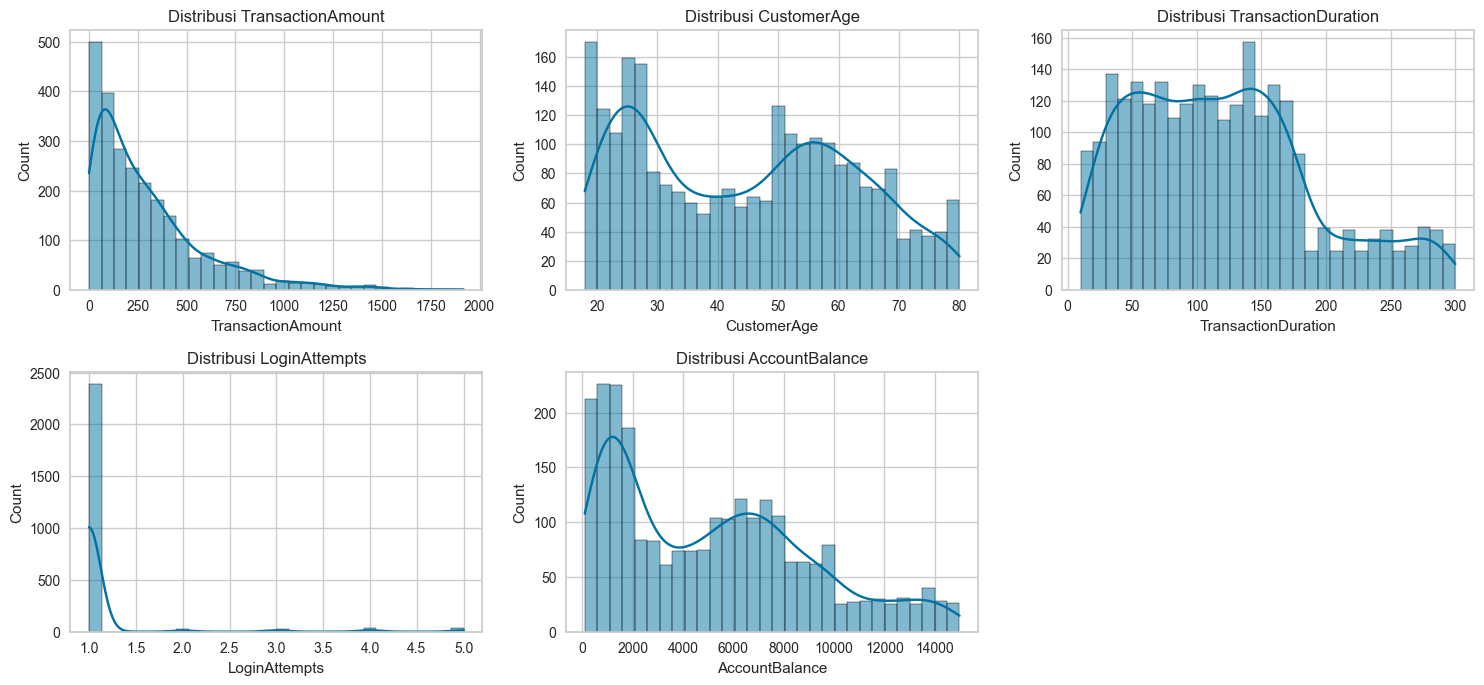

In [9]:
# Cek distribusi variabel numerik
numerical_cols = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

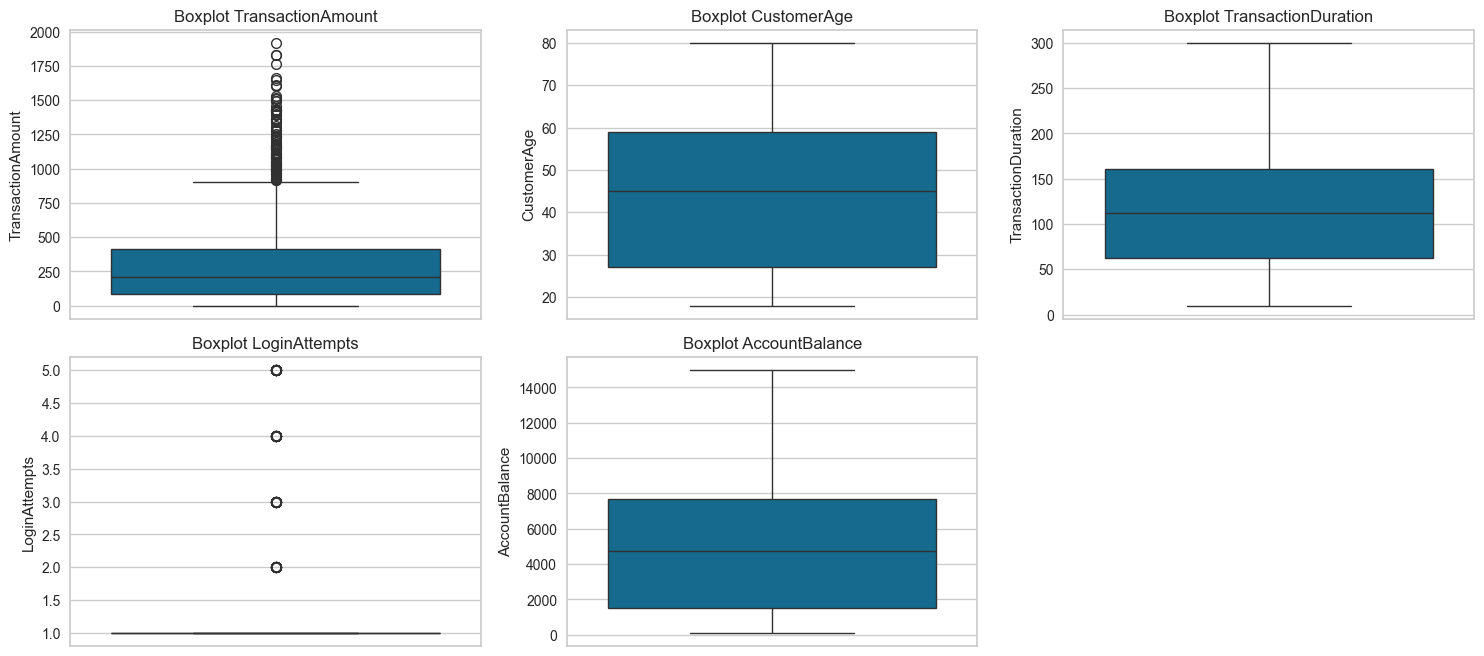

In [10]:
# Boxplot untuk melihat outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

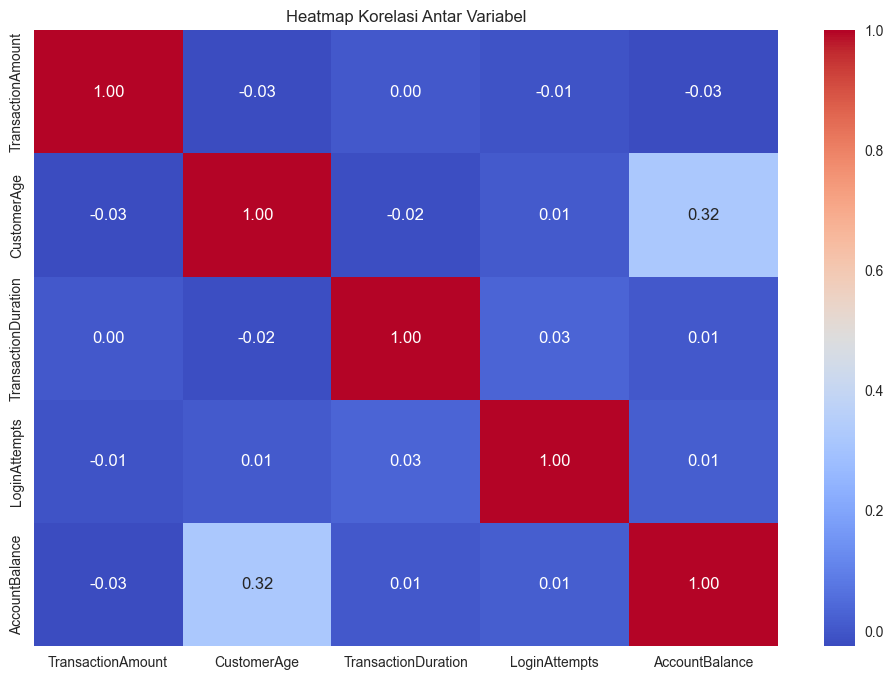

In [11]:
# Korelasi antar variabel numerik
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

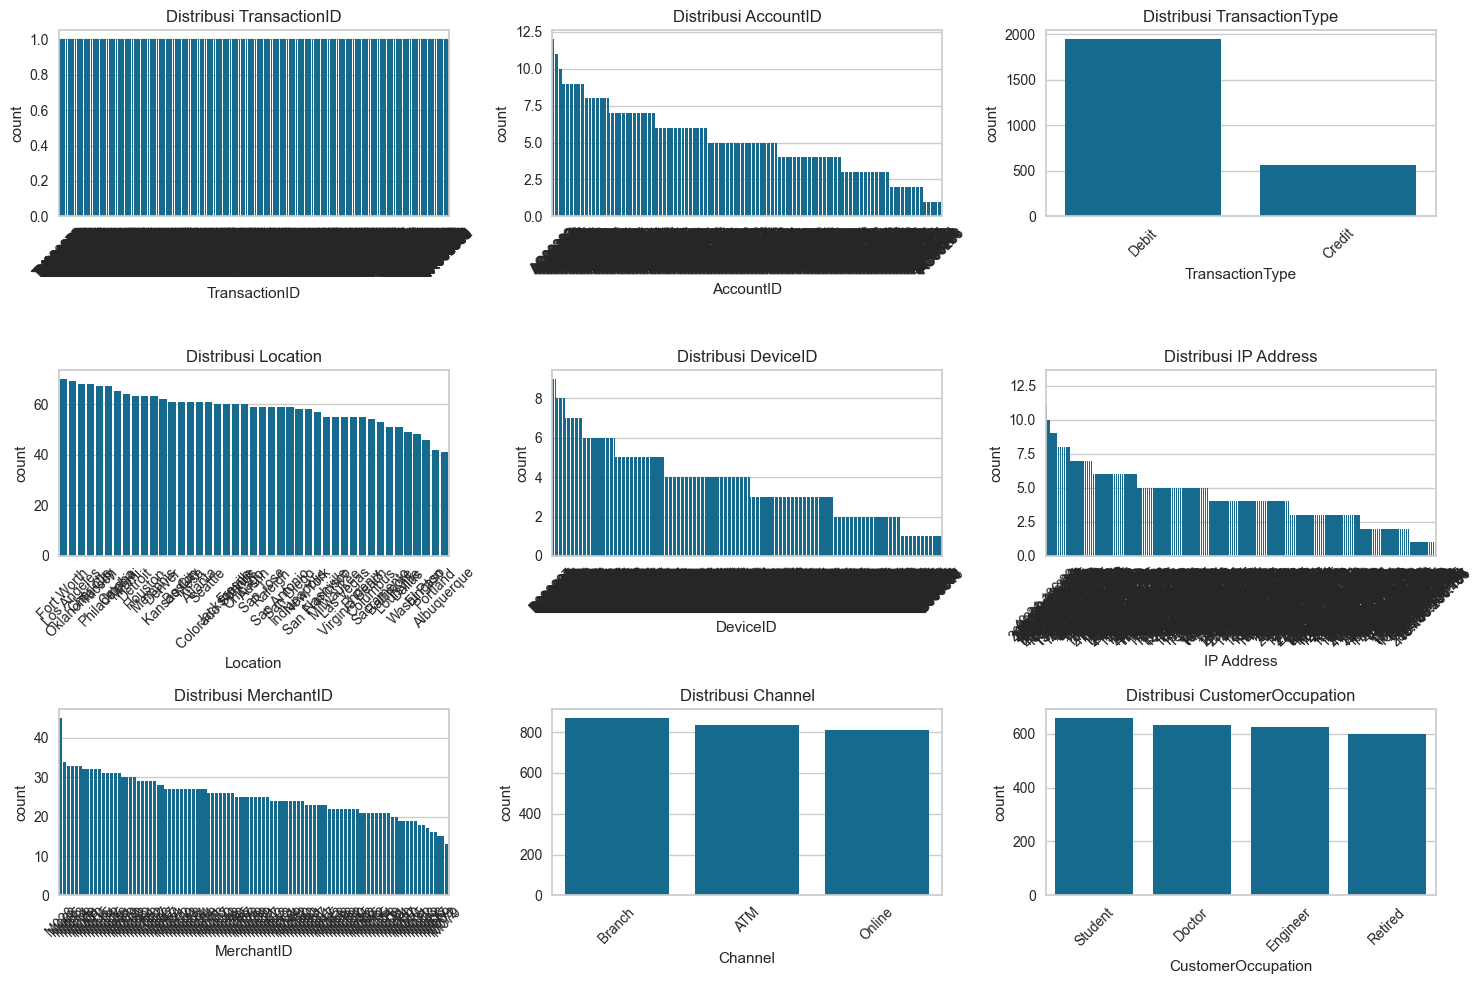

In [12]:
# Visualisasi variabel kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

C:\Users\TUF Gaming\AppData\Local\Temp\ipykernel_19688\4016974061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette="viridis", ax=axes[i])
C:\Users\TUF Gaming\AppData\Local\Temp\ipykernel_19688\4016974061.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels())
C:\Users\TUF Gaming\AppData\Local\Temp\ipykernel_19688\4016974061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette="viridis", ax=axes[i])
C:\Users\TUF Gaming\AppData\Local\Temp\ip

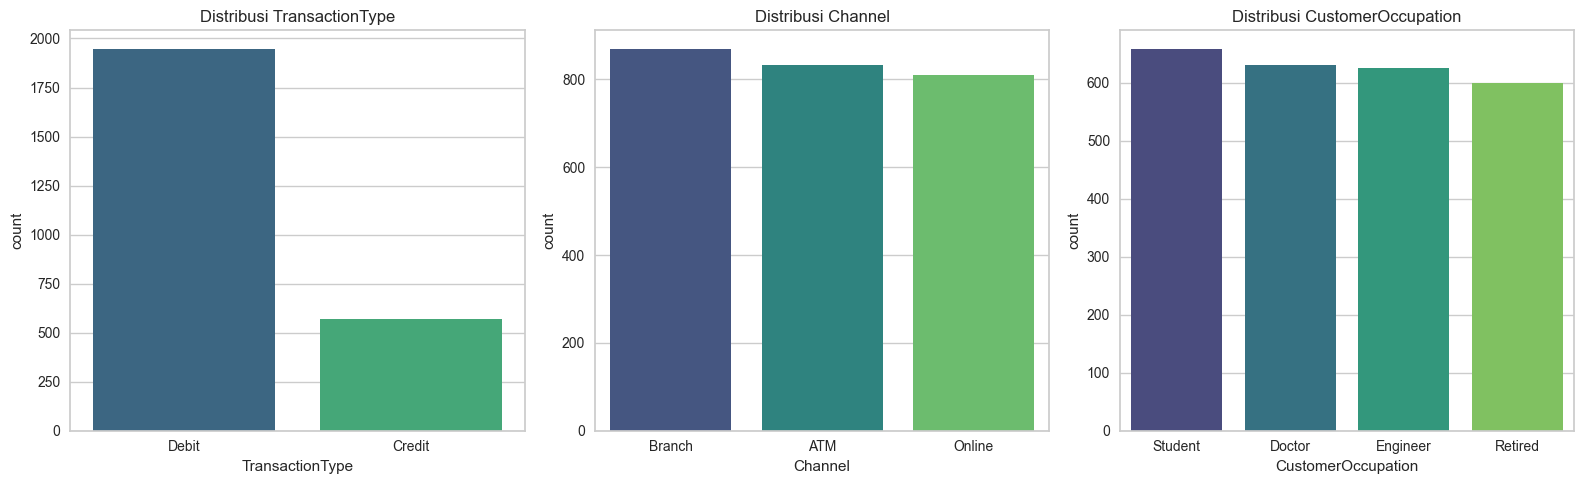

In [13]:
# Distribusi Data Kategorikal
categorical_cols = ["TransactionType", "Channel", "CustomerOccupation"]
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(16, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels())

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

In [14]:
# Hapus kolom yang tidak relevan
columns_to_drop = ["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID", "Location", "TransactionDate", "PreviousTransactionDate"]
df_cleaned = data.drop(columns=columns_to_drop)
df_cleaned.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Online,19,Student,56,1,1122.35
3,184.50,Debit,Online,26,Student,25,1,8569.06
4,13.45,Credit,Online,26,Student,198,1,7429.40


Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [15]:
# Menangani Outlier dengan Capping (Winsorization)
def cap_outliers(df_cleaned, col):
    Q1 = df_cleaned[col].quantile(0.25)  # Kuartil pertama
    Q3 = df_cleaned[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [16]:
# Daftar kolom yang memiliki outlier
outlier_columns = ["TransactionAmount", "LoginAttempts"]

# Terapkan capping pada setiap kolom
for col in outlier_columns:
    cap_outliers(df_cleaned, col)

# Cek ulang apakah masih ada outlier setelah penanganan
outliers_after = {}
for col in outlier_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after[col] = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].shape[0]

outliers_after

{'TransactionAmount': 113, 'LoginAttempts': 122}

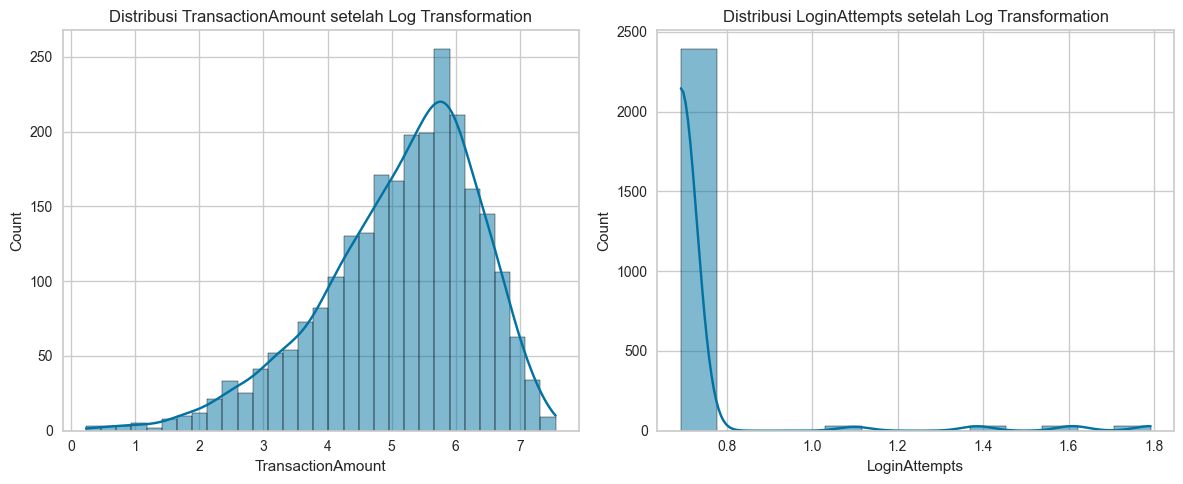

In [17]:
# Daftar kolom yang memiliki outlier
outlier_columns = ["TransactionAmount", "LoginAttempts"]

# Terapkan log transformation (tambahkan 1 untuk menghindari log(0))
df_cleaned_log = df_cleaned.copy()
for col in outlier_columns:
    df_cleaned_log[col] = np.log1p(df_cleaned_log[col])  # log(1 + x)

# Cek distribusi setelah log transformation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df_cleaned_log[col], kde=True)
    plt.title(f"Distribusi {col} setelah Log Transformation")

plt.tight_layout()
plt.show()

In [18]:
outliers_after_log = {}
for col in outlier_columns:
    Q1 = df_cleaned_log[col].quantile(0.25)
    Q3 = df_cleaned_log[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after_log[col] = df_cleaned_log[
        (df_cleaned_log[col] < lower_bound) | (df_cleaned_log[col] > upper_bound)
    ].shape[0]

print("Jumlah outlier setelah log transformation:", outliers_after_log)

Jumlah outlier setelah log transformation: {'TransactionAmount': 44, 'LoginAttempts': 122}


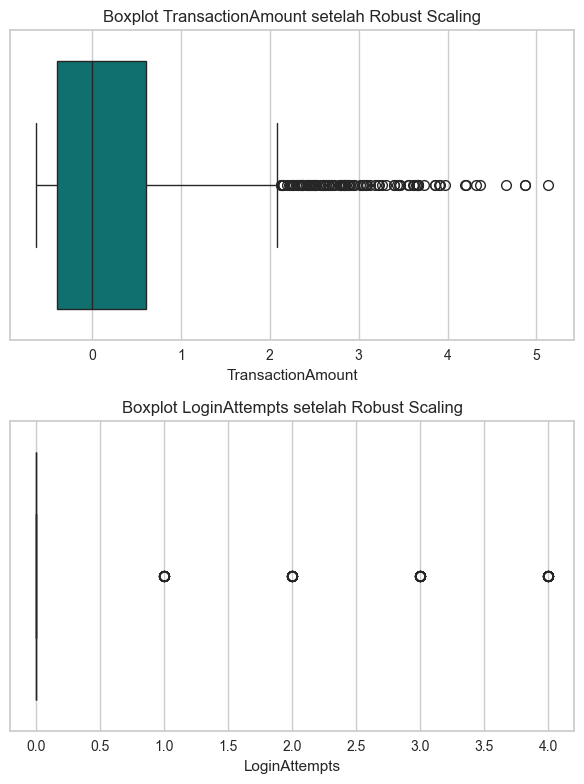

In [19]:
from sklearn.preprocessing import RobustScaler

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Daftar kolom yang akan ditransformasikan
outlier_columns = ["TransactionAmount", "LoginAttempts"]

# Terapkan Robust Scaling
df_scaled = df_cleaned.copy()
df_scaled[outlier_columns] = scaler.fit_transform(df_cleaned[outlier_columns])

# Visualisasi hasil setelah Robust Scaling
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# Boxplot setelah Robust Scaling
sns.boxplot(x=df_scaled["TransactionAmount"], ax=axes[0], color='teal')
axes[0].set_title("Boxplot TransactionAmount setelah Robust Scaling")

sns.boxplot(x=df_scaled["LoginAttempts"], ax=axes[1], color='teal')
axes[1].set_title("Boxplot LoginAttempts setelah Robust Scaling")

plt.tight_layout()
plt.show()


In [20]:
# Daftar kolom yang akan diperiksa outliernya
outlier_columns = ["TransactionAmount", "LoginAttempts"]

# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(df_cleaned, col):
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Terapkan outlier removal untuk setiap kolom
for col in outlier_columns:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Simpan dataset setelah outlier removal
df_cleaned.to_csv("df_no_outliers.csv", index=False)

df_cleaned.shape  # Cek jumlah data setelah outlier removal

(2282, 8)

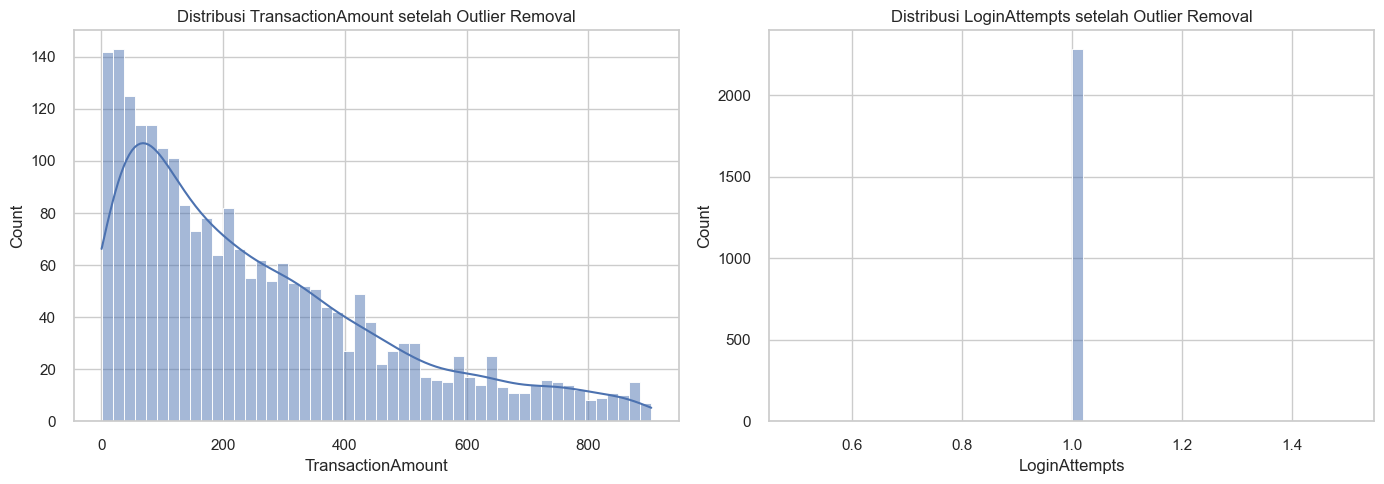

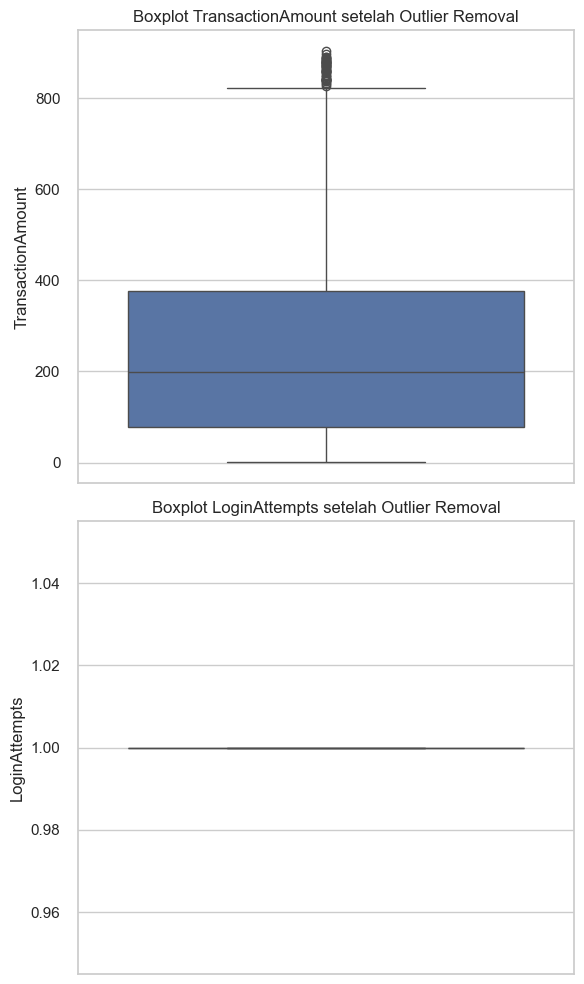

In [21]:
# Set style seaborn
sns.set(style="whitegrid")

# Visualisasi distribusi setelah outlier removal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for i, col in enumerate(outlier_columns):
    sns.histplot(df_cleaned[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribusi {col} setelah Outlier Removal")

plt.tight_layout()
plt.show()

# Visualisasi boxplot setelah outlier removal
fig, axes = plt.subplots(2, 1, figsize=(6, 10))
for i, col in enumerate(outlier_columns):
    sns.boxplot(y=df_cleaned[col], ax=axes[i])
    axes[i].set_title(f"Boxplot {col} setelah Outlier Removal")

plt.tight_layout()
plt.show()

In [22]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [23]:
# Cek statistik sebelum capping
print("Sebelum Capping:")
print(df_cleaned[outlier_columns].describe())

# Terapkan capping
for col in outlier_columns:
    cap_outliers(df_cleaned, col)

# Cek statistik setelah capping
print("\nSetelah Capping:")
print(df_cleaned[outlier_columns].describe())


Sebelum Capping:
       TransactionAmount  LoginAttempts
count        2282.000000         2282.0
mean          255.525596            1.0
std           217.793773            0.0
min             0.260000            1.0
25%            77.847500            1.0
50%           198.315000            1.0
75%           376.255000            1.0
max           903.190000            1.0

Setelah Capping:
       TransactionAmount  LoginAttempts
count        2282.000000         2282.0
mean          255.525596            1.0
std           217.793773            0.0
min             0.260000            1.0
25%            77.847500            1.0
50%           198.315000            1.0
75%           376.255000            1.0
max           903.190000            1.0


In [24]:
df_cleaned

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Online,19,Student,56,1,1122.35
3,184.50,Debit,Online,26,Student,25,1,8569.06
4,13.45,Credit,Online,26,Student,198,1,7429.40
...,...,...,...,...,...,...,...,...
2507,856.21,Credit,Branch,33,Doctor,109,1,12690.79
2508,251.54,Debit,Branch,48,Doctor,177,1,254.75
2509,28.63,Debit,Branch,56,Retired,146,1,3382.91
2510,185.97,Debit,Online,23,Student,19,1,1776.91


In [25]:
# Copy dataset untuk encoding
df_encoded = df_cleaned.copy()

# --- One-Hot Encoding ---
one_hot_cols = ["TransactionType", "Channel"]
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

# --- Label Encoding ---
label_cols = ["CustomerOccupation"]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Simpan encoder untuk interpretasi nanti

# Cek hasil encoding
df_encoded.head()

,TransactionAmount,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online
0,14.09,70,0,81,1,5112.21,True,False,False
1,376.24,68,0,141,1,13758.91,True,False,False
2,126.29,19,3,56,1,1122.35,True,False,True
3,184.50,26,3,25,1,8569.06,True,False,True
4,13.45,26,3,198,1,7429.40,False,False,True


In [26]:
# Pilih kolom numerik yang akan dinormalisasi
numerical_cols = ["TransactionAmount", "AccountBalance", "TransactionDuration", "LoginAttempts"]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Cek hasil normalisasi
df_encoded.head()

,TransactionAmount,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online
0,0.015317,70,0,0.244828,0.0,0.336832,True,False,False
1,0.416400,68,0,0.451724,0.0,0.918055,True,False,False
2,0.139579,19,3,0.158621,0.0,0.068637,True,False,True
3,0.204047,26,3,0.051724,0.0,0.569198,True,False,True
4,0.014608,26,3,0.648276,0.0,0.492591,False,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

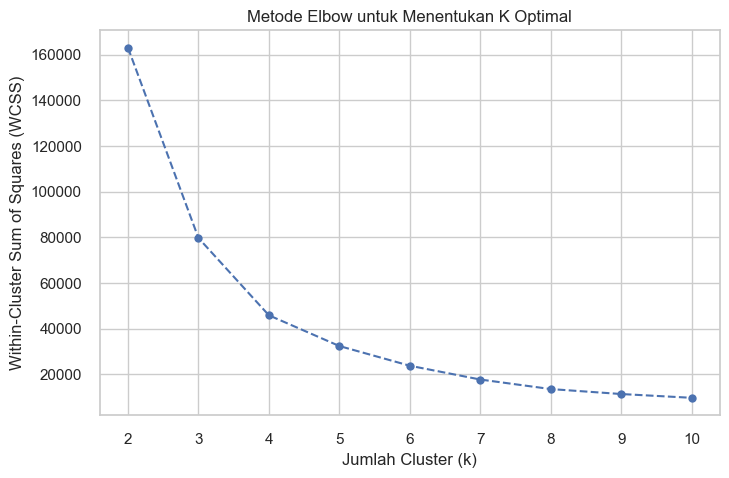

In [27]:
# Clustering dengan K-Means

# Tentukan jumlah cluster optimal dengan metode Elbow
wcss = []
K_range = range(2, 11)  # Uji K dari 2 sampai 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

# Plot hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [28]:
k_optimal = 4  # Sesuai hasil elbow method
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_encoded)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_encoded, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5627


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [29]:
# Terapkan K-Means dengan k = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_encoded["Cluster"] = kmeans.fit_predict(df_encoded)

# Cek jumlah sampel per cluster
df_encoded["Cluster"].value_counts()

Cluster
1    753
3    622
0    476
2    431
Name: count, dtype: int64

In [30]:
# Analisis Karakteristik Cluster

# Hitung statistik rata-rata per cluster
cluster_summary = df_encoded.groupby("Cluster").mean()

# Tampilkan hasil
cluster_summary

,TransactionAmount,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Debit,Channel_Branch,Channel_Online
Cluster,,,,,,,,,
0,0.274783,69.357143,1.474790,0.361975,0.0,0.390331,0.764706,0.329832,0.308824
1,0.296003,24.369190,2.520584,0.375885,0.0,0.172759,0.792829,0.354582,0.322709
2,0.274359,38.939675,0.542923,0.386095,0.0,0.460858,0.779582,0.343387,0.348028
3,0.278463,54.371383,0.996785,0.379028,0.0,0.410388,0.750804,0.363344,0.311897


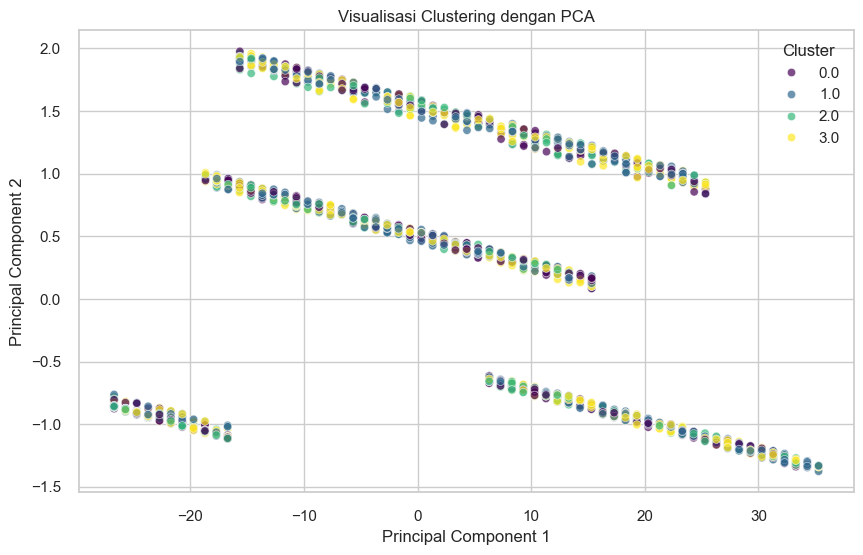

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA ke 2 komponen utama
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop(columns=['Cluster']))  # Drop label cluster sebelum transformasi

# Buat DataFrame untuk visualisasi
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_encoded['Cluster']  # Tambahkan label cluster

# Plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title("Visualisasi Clustering dengan PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

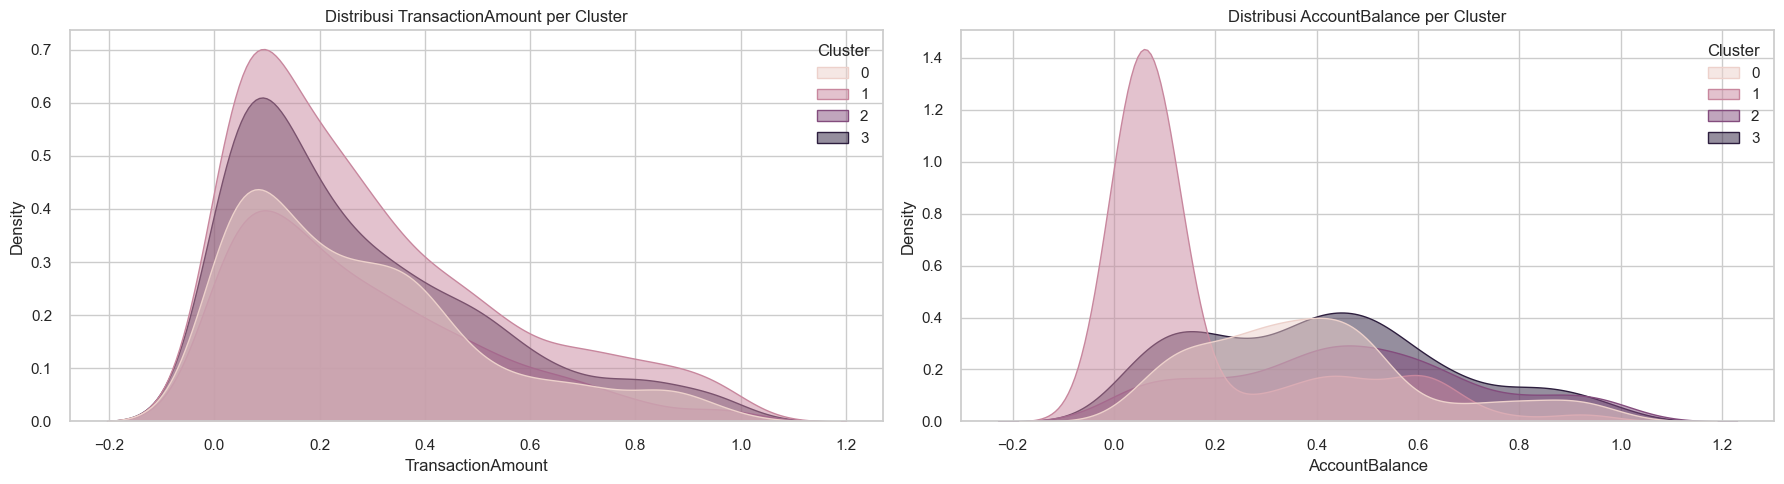

In [32]:
# Visualisasi Distribusi Fitur per Cluster
# Pilih fitur utama untuk dianalisis
features_to_plot = ["TransactionAmount", "AccountBalance"]

# Buat subplots untuk visualisasi distribusi setiap fitur berdasarkan cluster
fig, axes = plt.subplots(nrows=1, ncols=len(features_to_plot), figsize=(18, 5))

for i, feature in enumerate(features_to_plot):
    sns.kdeplot(data=df_encoded, x=feature, hue=df_encoded['Cluster'], fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} per Cluster')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [33]:
# Lihat distribusi cluster
print(df_encoded["Cluster"].value_counts())

# Lihat ringkasan statistik tiap cluster
cluster_summary = df_encoded.groupby("Cluster").mean()
print(cluster_summary)

Cluster
1    753
3    622
0    476
2    431
Name: count, dtype: int64
         TransactionAmount  CustomerAge  CustomerOccupation  \
Cluster                                                       
0                 0.274783    69.357143            1.474790   
1                 0.296003    24.369190            2.520584   
2                 0.274359    38.939675            0.542923   
3                 0.278463    54.371383            0.996785   

         TransactionDuration  LoginAttempts  AccountBalance  \
Cluster                                                       
0                   0.361975            0.0        0.390331   
1                   0.375885            0.0        0.172759   
2                   0.386095            0.0        0.460858   
3                   0.379028            0.0        0.410388   

         TransactionType_Debit  Channel_Branch  Channel_Online  
Cluster                                                         
0                     0.764706        0.32

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [34]:
# Asumsikan cluster 2 adalah fraud
df_encoded["FraudLabel"] = df_encoded["Cluster"].apply(lambda x: 1 if x == 2 else 0)

# Cek distribusi label
print(df_encoded["FraudLabel"].value_counts())

FraudLabel
0    1851
1     431
Name: count, dtype: int64


In [35]:
# Interpretasi Target
# Menghitung jumlah fraud dan non-fraud dalam tiap cluster
df_encoded.groupby("Cluster")["FraudLabel"].value_counts(normalize=True) * 100

Cluster  FraudLabel
0        0             100.0
1        0             100.0
2        1             100.0
3        0             100.0
Name: proportion, dtype: float64

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [36]:
print(f"Fitur yang dikenali oleh scaler: {scaler.n_features_in_}")
print(f"Jumlah fitur di df_encoded: {df_encoded.shape[1]}")

Fitur yang dikenali oleh scaler: 4
Jumlah fitur di df_encoded: 11


In [37]:
# Ambil hanya fitur yang di-scale
features_scaled = ['TransactionAmount', 'CustomerAge', 'CustomerOccupation', 'AccountBalance']

# Lakukan inverse transform hanya pada fitur yang di-scale
df_original_scaled = scaler.inverse_transform(df_encoded[features_scaled])

# Ubah kembali ke DataFrame
df_original_scaled = pd.DataFrame(df_original_scaled, columns=features_scaled)

# Gabungkan kembali dengan fitur lain yang tidak di-scale
df_original = df_encoded.copy()
df_original[features_scaled] = df_original_scaled

print(df_original.head())

   TransactionAmount  CustomerAge  CustomerOccupation  TransactionDuration  \
0              14.09   1041473.05                10.0             0.244828   
1             376.24   1011719.57                10.0             0.451724   
2             126.29    282759.31               880.0             0.158621   
3             184.50    386896.49               880.0             0.051724   
4              13.45    386896.49               880.0             0.648276   

   LoginAttempts  AccountBalance  TransactionType_Debit  Channel_Branch  \
0            0.0        1.336832                   True           False   
1            0.0        1.918055                   True           False   
2            0.0        1.068637                   True           False   
3            0.0        1.569198                   True           False   
4            0.0        1.492591                  False           False   

   Channel_Online  Cluster  FraudLabel  
0           False        0           0 

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [38]:
# Melihat ringkasan statistik tiap cluster
cluster_summary = df_encoded.groupby("Cluster").agg(["mean", "median", "min", "max"])
print(cluster_summary)

        TransactionAmount                               CustomerAge         \
                     mean    median       min       max        mean median   
Cluster                                                                      
0                0.274783  0.221723  0.001728  0.983808   69.357143   68.0   
1                0.296003  0.223805  0.000000  1.000000   24.369190   25.0   
2                0.274359  0.215665  0.000066  0.992912   38.939675   39.0   
3                0.278463  0.209274  0.000642  0.981172   54.371383   55.0   

                CustomerOccupation         ... Channel_Branch        \
        min max               mean median  ...            min   max   
Cluster                                    ...                        
0        62  80           1.474790    2.0  ...          False  True   
1        18  31           2.520584    3.0  ...          False  True   
2        32  46           0.542923    1.0  ...          False  True   
3        47  61           0

In [39]:
# Hitung jumlah transaksi dan fraud dalam tiap cluster
fraud_counts = df_encoded.groupby("Cluster")["FraudLabel"].sum()
total_counts = df_encoded["Cluster"].value_counts().sort_index()

# Buat DataFrame untuk analisis
fraud_analysis = pd.DataFrame({
    "Total Transaksi": total_counts,
    "Total Fraud": fraud_counts,
    "Persentase Fraud (%)": (fraud_counts / total_counts) * 100
})

print(fraud_analysis)

         Total Transaksi  Total Fraud  Persentase Fraud (%)
Cluster                                                    
0                    476            0                   0.0
1                    753            0                   0.0
2                    431          431                 100.0
3                    622            0                   0.0


# Interpretasi Cluster dan Analisis Karakteristik Cluster dari Model KMeans:

## Cluster 0:
- **TransactionAmount rata-rata:** 0.275 (min: 0.0017, max: 0.984)
- **CustomerAge rata-rata**: 69 tahun (min: 62, max: 80)
- **CustomerOccupation**: Mayoritas memiliki kode pekerjaan 2.
- **TransactionDuration rata-rata**: 0.362 (min: 0.0, max: 0.972)
- **AccountBalance rata-rata**: 0.390 (min: 0.0071, max: 0.995)
- **TransactionType**: Mayoritas transaksi adalah Debit.
- **FraudLabel**: Mayoritas transaksi bukan fraud.

- **Analisis**: Cluster ini cenderung terdiri dari pelanggan yang lebih tua (rata-rata 69 tahun) dengan transaksi dalam jumlah sedang dan saldo akun yang moderat. Mayoritas transaksi bukan merupakan fraud.

## Cluster 1:
- **TransactionAmount rata-rata**: 0.296 (min: 0.0000, max: 1.000)
- **CustomerAge rata-rata**: 24 tahun (min: 18, max: 31)
- **CustomerOccupation**: Mayoritas memiliki kode pekerjaan 3.
- **TransactionDuration rata-rata**: 0.376 (min: 0.0, max: 0.997)
- **AccountBalance rata-rata**: 0.173 (min: 0.0000, max: 0.959)
- **TransactionType**: Mayoritas transaksi adalah Debit.
- **FraudLabel**: Mayoritas transaksi bukan fraud.

- **Analisis**: Cluster ini berisi pelanggan muda dengan rata-rata usia 24 tahun. Mereka cenderung melakukan transaksi dalam jumlah sedang, namun dengan saldo akun yang relatif lebih rendah dibandingkan cluster lain.

## Cluster 2:
- **TransactionAmount rata-rata**: 0.274 (min: 0.000066, max: 0.993)
- **CustomerAge rata-rata**: 39 tahun (min: 32, max: 46)
- **CustomerOccupation**: Mayoritas memiliki kode pekerjaan 1.
- **TransactionDuration rata-rata**: 0.386 (min: 0.0, max: 1.000)
- **AccountBalance rata-rata**: 0.461 (min: 0.0008, max: 1.000)
- **TransactionType**: Mayoritas transaksi adalah Debit.
- **FraudLabel**: Mayoritas transaksi adalah fraud.

- **Analisis**: Cluster ini menarik karena transaksi di dalamnya memiliki kemungkinan besar merupakan fraud. Mayoritas pelanggan berusia sekitar 39 tahun dengan saldo akun yang relatif tinggi dibandingkan cluster lain.

## Cluster 3:
- **TransactionAmount rata-rata**: 0.278 (min: 0.0006, max: 0.981)
- **CustomerAge rata-rata**: 54 tahun (min: 47, max: 61)
- **CustomerOccupation**: Mayoritas memiliki kode pekerjaan 1.
- **TransactionDuration rata-rata**: 0.379 (min: 0.0, max: 0.997)
- **AccountBalance rata-rata**: 0.410 (min: 0.0013, max: 0.998)
- **TransactionType**: Mayoritas transaksi adalah Debit.
- **FraudLabel**: Mayoritas transaksi bukan fraud.

- **Analisis**: Cluster ini berisi pelanggan usia menengah (rata-rata 54 tahun) dengan saldo akun yang cukup tinggi. Transaksi dalam cluster ini sebagian besar bukan merupakan fraud.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [57]:
df_encoded.to_csv("df_clus.csv", index=False)